<a href="https://colab.research.google.com/github/Anjal1p/Python-practice/blob/master/MNIST_MyFirst_Basic_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf


***download data sets***


*   In start, set all parameters to TRUE
*   It containts a bunch of arrays
*   gray scale images
*   cmap (useful for warmer colors, gradient) - mainly used to make data look beautiful
*   *min and max*: toNormalize data

*Data is a set of arrays that can be reshaped and visualized*

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [0]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Visualizing the data
libraries: cboard, matlib and matplotlib

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
mnist.train.images.shape

(55000, 784)

In [0]:
mnist.train.images[567]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
my_img = mnist.train.images[567].reshape(28,28)

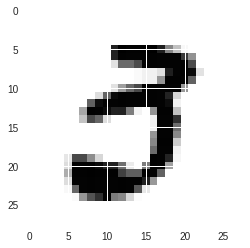

In [0]:
plt.imshow(my_img)

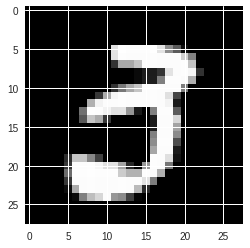

In [0]:
plt.imshow(my_img, cmap="gist_gray")

In [0]:
my_img.min()

0.0

In [0]:
my_img.max()

1.0

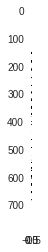

In [0]:
my_img2 = mnist.train.images[567].reshape(784,1)
plt.imshow(my_img2)

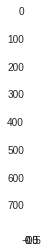

In [0]:
plt.imshow(mnist.train.images[567].reshape(784,1), cmap = "gist_gray", aspect = 0.3) # Aspect ratio

## Creating our NN Model

1. Placeholders
2. Variables
3. Creating our Comp. graph operation
4. Loss Function
5. Optimizer
6. Create and run the session

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 784])

# Weights, Bias
W = tf.Variable(tf.zeros([784, 10]))  # 784 pixels and 10 labels
b = tf.Variable(tf.zeros([10]))  #same length as actual labels

In [0]:
# create the graph - find weights and bias and add to graph
y = tf.matmul(x,W) + b

In [0]:
y_true = tf.placeholder(tf.float32, [None, 10])

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits = y))

In [0]:
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05) # can change to 0.5 

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.5)

In [0]:
train = optimizer.minimize(cross_entropy)

In [0]:
# initialize variables

init = tf.global_variables_initializer()

# Create and Run session

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  # Train for 10000 steps bc GPUs make it run fast
  for step in range(100000):
    # Touple unpacking - returns your touple with your x's and y's
    batch_x, batch_y = mnist.train.next_batch(100)
    
    sess.run(train, feed_dict = {x:batch_x, y_true:batch_y})
    
  # evaluate train model
  matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1)) # return index position for the label with the highest probability
    
  # define accuracy - Casting it 
  accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
  print(sess.run(accuracy, feed_dict = {x:mnist.test.images, y_true:mnist.test.labels}))
    

0.9263


# get familiarized with libraries
